# 두 변수의 관계 분석하기

<img src = "KakaoTalk_20220821_225647819.png">

뮤 = 모평균, 시그마 제곱 = 모분산, X = 표본평균, s 제곱 = 표본분산

# 숫자 -> 숫자

# 산점도

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings( 'ignore' )
import scipy.stats as spst

titanic = pd.read_csv('titanic.csv')
titanic.drop('Cabin', axis = 1, inplace = True)
titanic.dropna(axis = 0, inplace = True) # 결측치 제거 필수
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


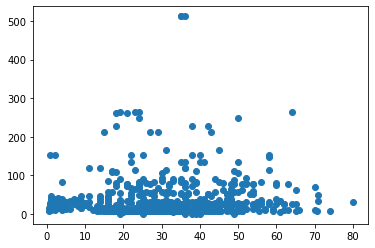

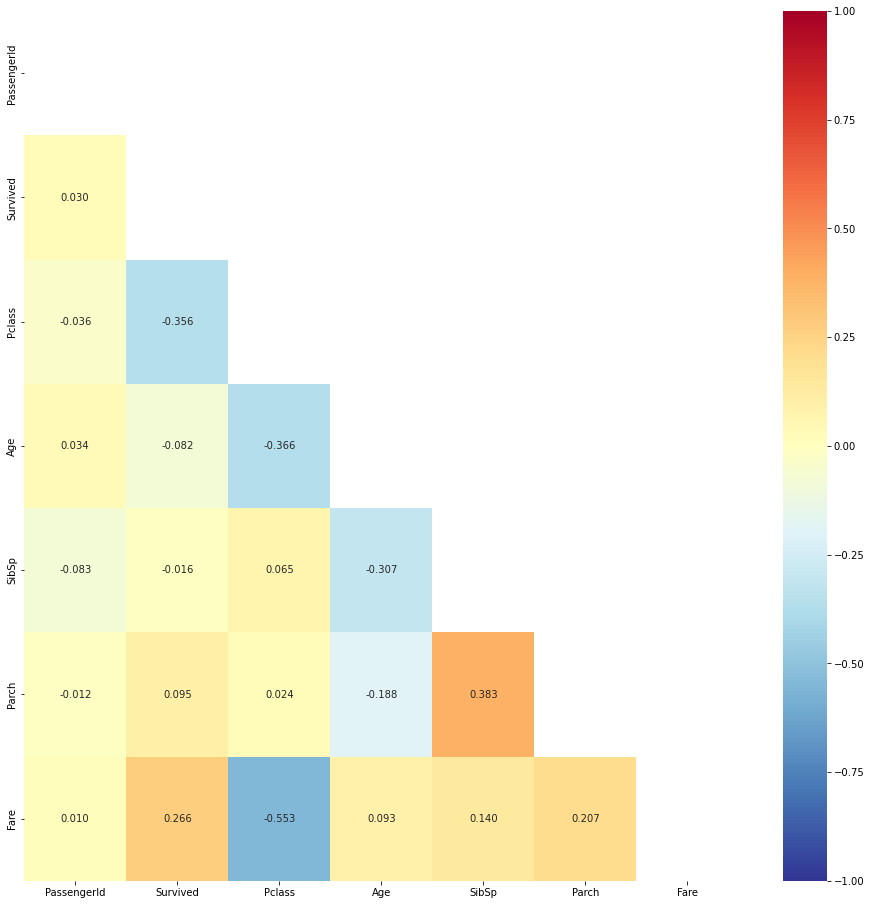

In [19]:
plt.scatter(titanic['Age'], titanic['Fare'])
plt.show()

spst.pearsonr(titanic['Age'], titanic['Fare']) # 왼쪽 상관계수, 오른쪽 p-value
titanic.corr() # 타이타닉의 모든 데이터의 상관계수를 다 구해줌

plt.figure(figsize = (16, 16)) # 상관계수 heatmap 그리는법
mask = np.zeros_like(titanic.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1) # fmt는 e+05로 표시되는거 바꿔줌
plt.show()

# 범주 -> 숫자

#### 선행개념
- 중심극한정리 : 모집단이 어떻게 생겼든 n만큼의 값을 뽑아서 평균을 내고 그걸 충분히 많은 n회 반복하면 그 평균들의 분포는 정규분포를 따른다
- 표준편차는 std(), 표준오차는 sem()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

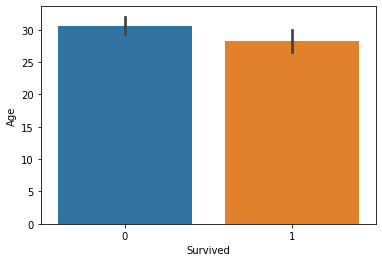

In [20]:
# 대립가설이 생존여부에 따른 나이의 차이가 있다 일때
sns.barplot(x = 'Survived', y = 'Age', data = titanic)
# 결과에서 신뢰구간이 안겹치면 평균의 차이가 있다는 뜻, 많이 겹치면 반대
# 평균의 차이가 클수록 서로 연관이 있음

# T 통계량
- 두 평균의 차이를 표준오차로 나눈 값, 기본적으로는 두 평균의 차이로 이해해도 됨
- 일반적으로 t값이 -2 > t, t > 2면 차이가 있다고 봄

In [22]:
died = titanic.loc[titanic['Survived'] == 0, 'Age']
Survived = titanic.loc[titanic['Survived'] == 1, 'Age']
spst.ttest_ind(died, Survived) # statistic=2.2043427748445956, 관련이 있긴한데 거의 없다

Ttest_indResult(statistic=2.2043427748445956, pvalue=0.027820316250851285)

# ANOVA

F_onewayResult(statistic=56.03144521440215, pvalue=2.556513826740675e-23)

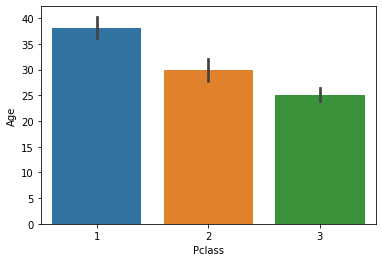

In [24]:
P_1 = titanic.loc[titanic['Pclass'] == 1, 'Age']
P_2 = titanic.loc[titanic['Pclass'] == 2, 'Age']
P_3 = titanic.loc[titanic['Pclass'] == 3, 'Age']

sns.barplot("Pclass","Age", data = titanic)

spst.f_oneway(P_1, P_2, P_3)

# 범주 -> 범주

# 100% stacked barplot, mosaic plot

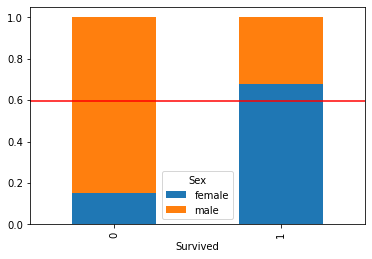

In [35]:
temp12 = pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index') # normalize쓰면 비율로 바꿔줌, 비율만 가지고 비교하므로 양에 대한 비교를 할 수 없음
temp12.plot.bar(stacked = True) # 위로 쌓아서 그래프를 그림
plt.axhline(1-titanic['Survived'].mean(), color='r') # 전체 평균 선
plt.show()

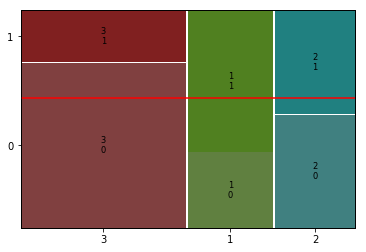

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(titanic, ['Pclass', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r') # 전체 평균 선, 멀리 떨어져 있을 수록 연관이 있음
plt.show()

# 카이**2 검정
- 귀무가설이 기대되는 빈도 --> 서로 관련이 없으면 수치가 증가

In [45]:
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
result = spst.chi2_contingency(table)
print('카이제곱통계량:', result[0])
print('p-value:', result[1])
print('기대빈도:', result[2]) # 보통 카이제곱 통계량은 자유도의 2~3배 보다 크면 차이가 있다고 봄
# 자유도는 Pclass = 2, Survived = 1

카이제곱통계량: 91.08074548791019
p-value: 1.6675060315554636e-20
기대빈도: 2
